## SIMPLE LINEAR REGRESSION

In [3]:
import seaborn as sns
import pandas as pd

#### 1.DATA COLLECTION

In [4]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2.Understanding the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 3.STATS SUMMARY

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### 4.RELATIONSHIP CHECK

##### Before using any model , we must confirm its relationship

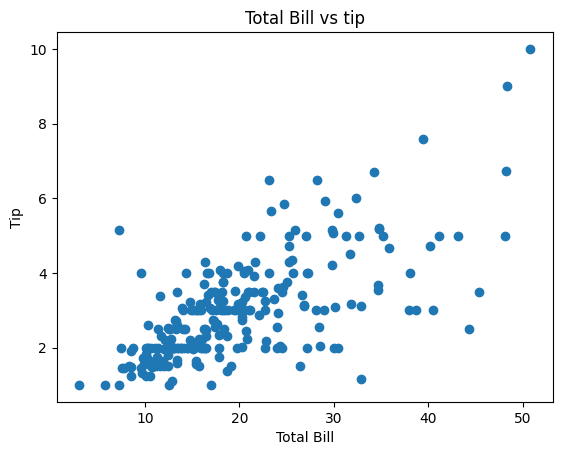

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs tip")
plt.show()

##### Observations:
##### 1. As the bill increases tip increases
##### 2. Relationship = Staright line ( can use linear regression)

#### 5.Feature & target Seperation

In [8]:
x=df[['total_bill']] # feature input should be in 2d array only
y=df['tip'] # feature oputpt is 1d

#### 6.Train , test and Split

##### A model must perform well on unseen data. So train,text,split are done

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### 7.Feature Standardization

##### Compare coefficients fairly , avoid dominanace of large values , prepare for ridge and lasso

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#fit only on training data
#prevents the data leakage

#### 8.Train Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient:",model.coef_)
print("Intercept:",model.intercept_)

Co-efficient: [0.93571714]
Intercept: 3.0877948717948724


In [12]:
y_pred=model.predict(x_test_scaled)

#### 9.Model Evaluation Metrics

In [13]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("r2 score:",r2)

r2 score: 0.5449381659234664


In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse:",mse)
print("rmse:",rmse)

mse: 0.5688142529229538
rmse: 0.7541977545199626


#### 10.Visualize the best fit line

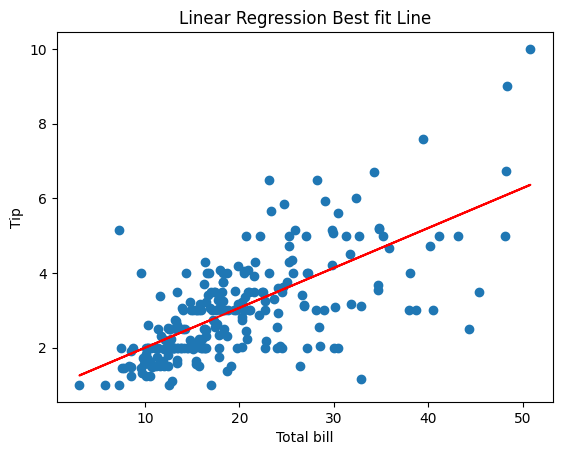

In [15]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color='red')
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best fit Line")
plt.show()

#### 11.Prediction

In [17]:
bill_amount=float(input("Enter the bill amount;"))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted tip: {predict_tip[0]:.2f}")

Predicted tip: 13.76


C:\Users\Bhava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
